Learning Objectives
===================

Linear Regression

In [1]:
# Load libraries
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import warnings

# Suppress Warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Load data
boston = load_boston()
X = boston.data
y = boston.target

In [3]:
# Create linear regression
regr = LinearRegression()

# Fit the linear regression
model = regr.fit(X, y)

In [4]:
# View the intercept
model.intercept_

36.49110328036103

In [5]:
# View the feature coefficients
model.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [ ]:
# Plot model!!!

Logistic Regression

In [6]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [7]:
# Load data with only two classes
iris = datasets.load_iris()
X = iris.data[:100,:]
y = iris.target[:100]

In [8]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [9]:
# Create logistic regression object
clf = LogisticRegression(random_state=0)

In [10]:
# Train model
model = clf.fit(X_std, y)

In [11]:
# Create new observation
new_observation = [[.5, .5, .5, .5]]

In [12]:
# Predict class
model.predict(new_observation)

array([1])

In [13]:
# View predicted probabilities
model.predict_proba(new_observation)

array([[0.18823041, 0.81176959]])

Decision Trees (Classification)

In [14]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [15]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [16]:
# Create decision tree classifer object using gini
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

In [17]:
# Train model
model = clf.fit(X, y)

In [18]:
# Make new observation
observation = [[ 5,  4,  3,  2]]

In [19]:
# Predict observation's class    
model.predict(observation)

array([1])

In [20]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)

array([[0., 1., 0.]])

Decision Trees (Regresssion)

In [21]:
# Load libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

In [22]:
# Load data with only two features
boston = datasets.load_boston()
X = boston.data[:,0:2]
y = boston.target

In [23]:
# Create decision tree classifer object
regr = DecisionTreeRegressor(random_state=0)

In [24]:
# Train model
model = regr.fit(X, y)

In [25]:
# Make new observation
observation = [[0.02, 16]]
              
# Predict observation's value  
model.predict(observation)

array([33.])

Random Forest

In [26]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np

# Set random seed
np.random.seed(0)

/Users/Joe/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [30]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [31]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


In [32]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [33]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

# View target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

In [37]:
# Create actual english names for the plants for each predicted plant class
preds = iris.target_names[clf.predict(test[features])]

In [38]:
# View the PREDICTED species for the first five observations
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [39]:
# View the ACTUAL species for the first five observations
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [40]:
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [41]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('sepal length (cm)', 0.11185992930506346),
 ('sepal width (cm)', 0.016341813006098178),
 ('petal length (cm)', 0.36439533040889194),
 ('petal width (cm)', 0.5074029272799464)]

In [42]:
import pandas as pd
from sklearn import neighbors
import numpy as np
%matplotlib inline  
import seaborn

In [43]:
training_data = pd.DataFrame()

training_data['test_1'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
training_data['test_2'] = [0.5846,0.2654,0.2615,0.4538,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]
training_data['outcome'] = ['win','win','win','win','win','loss','loss','loss','loss','loss']

training_data.head()

,test_1,test_2,outcome
0,0.3051,0.5846,win
1,0.4949,0.2654,win
2,0.6974,0.2615,win
3,0.3769,0.4538,win
4,0.2231,0.4615,win


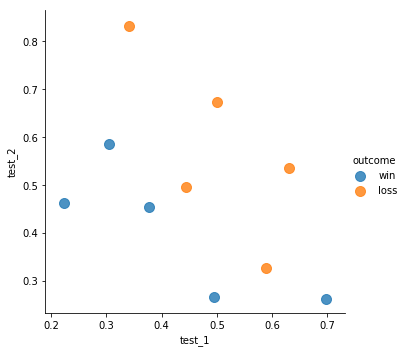

In [44]:
seaborn.lmplot('test_1', 'test_2', data=training_data, fit_reg=False,hue="outcome", scatter_kws={"marker": "D","s": 100})

In [45]:
X = training_data.as_matrix(columns=['test_1', 'test_2'])
y = np.array(training_data['outcome'])

/Users/Joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [46]:
clf = neighbors.KNeighborsClassifier(3, weights = 'uniform')
trained_model = clf.fit(X, y)

In [47]:
trained_model.score(X, y)

0.8

In [48]:
# Create a new observation with the value of the first independent variable, 'test_1', as .4 
# and the second independent variable, test_1', as .6 
x_test = np.array([[.4,.6]])

In [49]:
# Apply the learner to the new, unclassified observation.
trained_model.predict(x_test)

array(['loss'], dtype=object)

In [50]:
trained_model.predict_proba(x_test)

array([[0.66666667, 0.33333333]])

In [51]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [55]:
train_images.shape

(60000, 28, 28)

In [53]:
len(train_labels)

60000

In [54]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [56]:
test_images.shape

(10000, 28, 28)

In [57]:
len(test_labels)

10000

In [58]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [59]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [60]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [61]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [62]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [66]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0279 - acc: 0.9915
Epoch 2/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0221 - acc: 0.9934
Epoch 3/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0169 - acc: 0.9947
Epoch 4/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0133 - acc: 0.9960
Epoch 5/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.0106 - acc: 0.9968
Epoch 6/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.0079 - acc: 0.9979
Epoch 7/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0066 - acc: 0.9981
Epoch 8/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.0049 - acc: 0.9988
Epoch 9/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0039 - acc: 0.9989
Epoch 10/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.

In [67]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 80us/step


In [68]:
print('test_acc:', test_acc)

test_acc: 0.9813
